# Lec14: Discrete Random Variables and Distributions 
***

In this notebook we'll get some more practice with discrete random variables and see how we can play with binomial distributions using Python.   

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also need SciPy's binom function for computing binomial coefficients.  

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy.special import binom
%matplotlib inline

### Exercise 1 - Implementing and Sampling the Binomial Distribution 
***

**Part A**: Write a function that takes in the parameters of the binomial distribution, $n$ and $p$, and returns the probability distribution as a Numpy array. In order to get the coefficient in the binomial distribution, you'll need a way to compute the combination ${n \choose k}$.  You can do this from scratch using Python's factorial function, or you can get the value directly using Scipy's canned function [binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html).  

In [3]:
def binomial_dist(n, p):
    p = np.array([binom(n,k)*(p**k)*((1-p)**(n-k)) for k in range(n+1)])
    return p


**Part B**:
    
   i).  Create an array with the probability distribution for a binomial with n=100 and p=.26
   
   ii).  Print out the first 10 entries of the array
   
   iii). Then plot a histogram

In [7]:
prob = binomial_dist(100, 0.26)

# Here is a check that your binomial_pmf function at least sums to 1
np.sum(prob)

0.9999999999999999

In [20]:
binomial_dist(100,0.26)[:10]

array([8.37860995e-14, 2.94383593e-12, 5.11988762e-11, 5.87633949e-10,
       5.00680006e-09, 3.37756026e-08, 1.87895807e-07, 8.86519986e-07,
       3.62095494e-06, 1.30049913e-05])

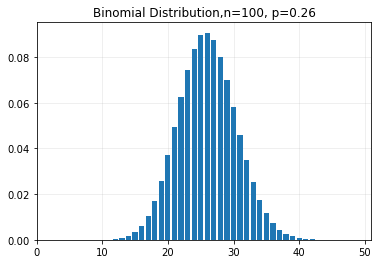

In [72]:
n=100
p=.26

X = np.array(range(n+1))
pmf = binomial_dist(n, p)

fig, ax = plt.subplots()

ax.bar(X, pmf);
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(0,51)
plt.title("Binomial Distribution,n=100, p=0.26");



**Part C**:  Let $X~Bin(100, 0.26)$  Use your function above to calculate the following:

   a).What is $P(X=8)$?
    
   b).  What is $P(X \leq 8)$
   
   c).  What is $P(X \leq 15)$?

In [14]:
prob_x_equals_8 = binomial_dist(100, 0.26)[7]

8.865199857745141e-07

In [15]:
prob_x_leq_8=np.sum(binomial_dist(100, 0.26)[:9])

4.734794997889318e-06

In [16]:
prob_x_leq_15 = np.sum(binomial_dist(100, 0.26)[:16])

0.006107026624913965

**Part D - SIMULATION**: So now you know the exact distribution of a binomial random variable, but very frequently we'll want to generate samples from that distribution.  


**Useful Built-In Functions:** Python has a built in function that can generate samples from a wide variety of distributions:

https://numpy.org/doc/stable/reference/random/generator.html



To generate random samples from a Binomial distribution we can use  Numpy's [binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) function. 

Read the documentation, and then try drawing 1000 samples from _Bin(n,p)_ for $n=100$ and $p=0.26$.  

In [71]:
x = np.random.binomial(n=100, p=0.26, size=1000)
x[:10]

array([22, 26, 28, 25, 28, 22, 20, 23, 21, 34])

**Part E**: We can approximate the theoretical distribution of _Bin(n,p)_ by drawing many many samples from the distribution and plotting a **density** histogram.  Do this now.  Additionally, use the function you wrote in **Part A** to get the exact density, and plot the distribution directly below the histogram of your sampled distribution.  How do they compare?  What happens if you use more or fewer samples in the histogram? 

Text(0.5, 1.0, 'Theoretical Binomial Distribution, n=100, p=0.26')

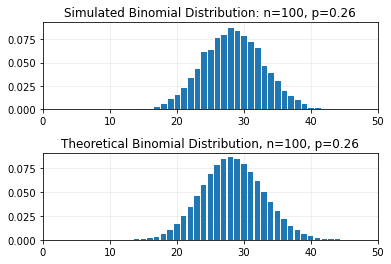

In [73]:
n = 109
p = 0.26

sample = np.random.binomial(n=n, p=p, size=10000)
bins = np.arange(-0.5, 100, 1)

X = np.array(range(n+1))
pmf = binomial_dist(n,p)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.subplots_adjust(hspace=0.5)

ax[0].hist(sample, edgecolor='white', density=True, bins=bins)
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([0, 50]);
ax[0].set_title("Simulated Binomial Distribution: n=100, p=0.26")

ax[1].bar(X, pmf)
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25);
ax[1].set_xlim([0, 50]);
ax[1].set_title("Theoretical Binomial Distribution, n=100, p=0.26")

### Exercise 2 - Simulating Roulette
*** 

A Las Vegas roulette board contains 38 numbers $\{0, 00, 1, 2, \ldots, 36\}$. Of the non-zero numbers, 18 are red and 18 are black. You can place bets on various number/color combinations and each type of bet pays-out at a different rate.  For example: 

- If you bet $\$1$ on red (or black) and win, then you win $\$1$ (i.e. you get your original dollar back, plus another dollar). 
- If you bet $\$1$ any particular number and win, then you win $\$35$ (i.e you get your original dollar back, plus $\$35$). 
- If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$). 

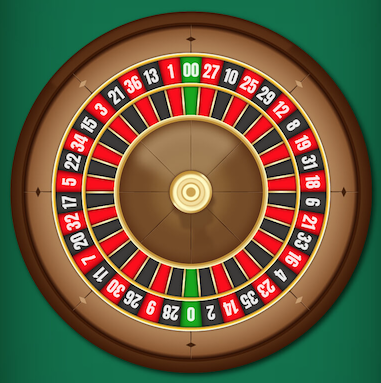

It seems like there are so many ways to win!  In reality, some very careful probability theory was done by the game designers to ensure that there is not much difference in any particular payout.  We'll explore roulette both by simulation and by hand in this exercise and continue this question in the HW. 






**Part A** Calculate the exact expectation of your winnings by betting on any particular number. Remember that the payout for hitting a number is $35$ to $1$.  

**Solution**: The chance of getting a particular number is $1$ in $38$.  We have: 

$$
E[\textrm{Winnings for Single Number}] = \color{red}{35}\cdot\frac{1}{38} \color{red}{- 1} \cdot \frac{37}{38} =  \color{blue}{-\frac{2}{38}}\approx -0.05263
$$

**Part B** Let's simulate this.  The following function simulates the spin of a Las Vegas roulette board.  

In [81]:
def spin_roulette():
    numbers = np.array(["0", "00"] + [str(ii) for ii in range(1,36+1)])
    red = [str(ii) for ii in [1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36]] 
    black = [str(ii) for ii in [2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35]]
    green = ["0", "00"]
    number = np.random.choice(numbers)
    color = "R" if number in red else "B" if number in black else "G"
    return number+color

spin_roulette()


'8B'

Code a simulation that estimates the expected winnings by betting on a particular number and compare to your answer in Part C. 

In [82]:
def number_winnings(number="00", num_spins=int(1e3)):
    num_winners = np.sum([number in spin_roulette() for ii in range(num_spins)])
    num_losers = num_spins - num_winners
    return (35*num_winners - 1*num_losers)/num_spins
    
print("E[Winnings] = {:.3f}".format(number_winnings(number="00", num_spins=int(1e6))))

E[Winnings] = -0.056
